In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import missingno as msno


In [72]:
df=pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df.rename(columns={X: X.replace(' ', '_') for X in df.columns},inplace=True)

In [73]:
df.rename(columns={X: X.replace(' ', '_') for X in df.columns})

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [74]:
df.info

<bound method DataFrame.info of        Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
0               200507      ATA Airlines                          TZ   
1               200507      ATA Airlines                          TZ   
2               200507      ATA Airlines                          TZ   
3               200507       Air Canada                           AC   
4               200507       Air Canada                           AC   
...                ...               ...                         ...   
15002           201603    Virgin America                          VX   
15003           201603    Virgin America                          VX   
15004           201603    Virgin America                          VX   
15005           201603   Virgin Atlantic                          VS   
15006           201603   Virgin Atlantic                          VS   

      Published_Airline Published_Airline_IATA_Code    GEO_Summary GEO_Region  \
0          ATA Airline

In [75]:
df.head()

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [77]:
df['Passenger_Count'].describe()

count     15007.000000
mean      29240.521090
std       58319.509284
min           1.000000
25%        5373.500000
50%        9210.000000
75%       21158.500000
max      659837.000000
Name: Passenger_Count, dtype: float64

In [ ]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


<AxesSubplot:>

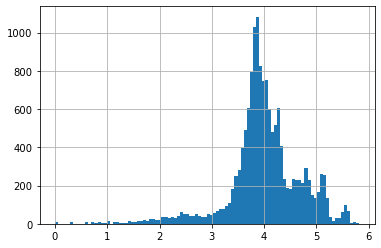

In [ ]:
np.log10(df['Passenger Count']).hist(bins=100)

<AxesSubplot:>

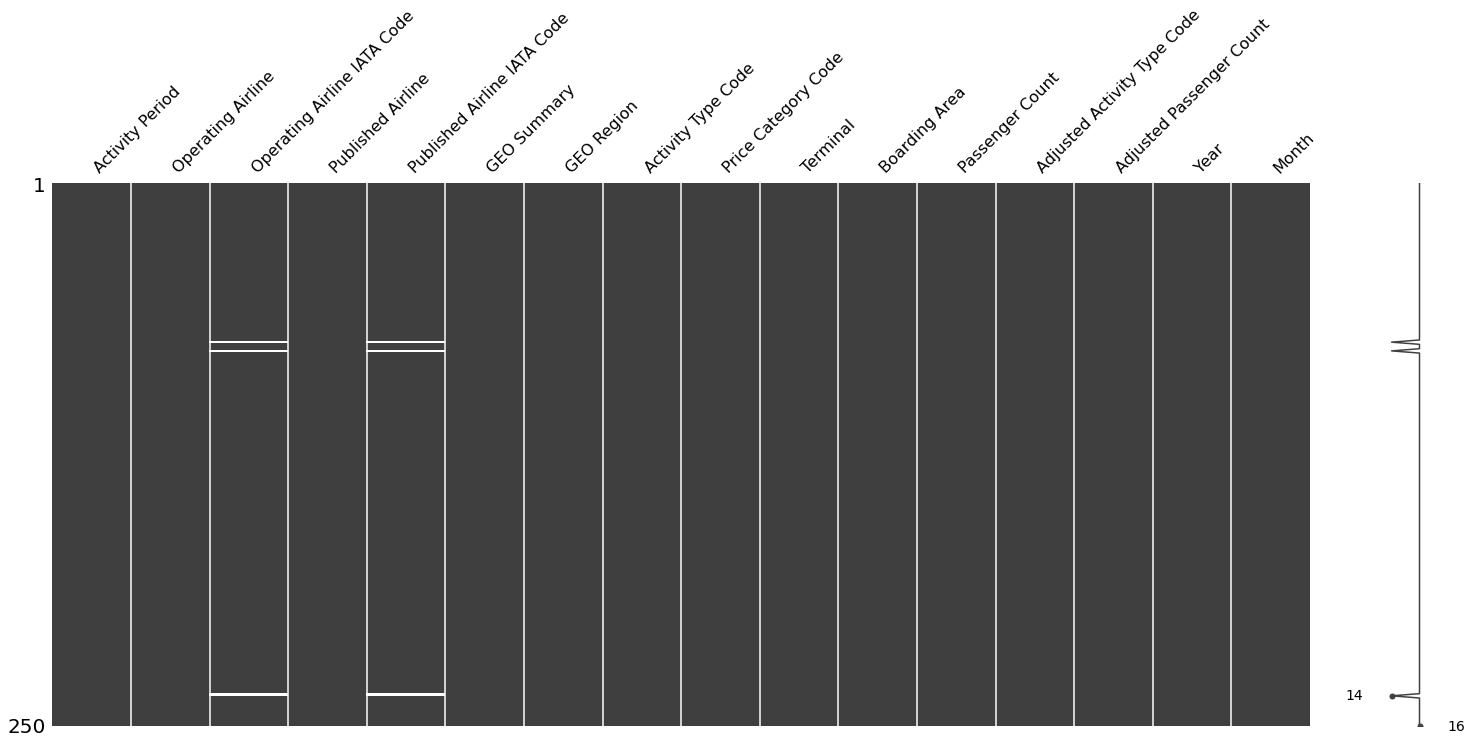

In [ ]:
msno.matrix(df.sample(250))

In [78]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

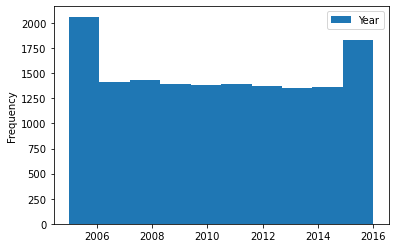

In [79]:
df.plot(x='Passenger_Count', y='Year',kind='hist')


In [80]:
df.head

<bound method NDFrame.head of        Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
0               200507      ATA Airlines                          TZ   
1               200507      ATA Airlines                          TZ   
2               200507      ATA Airlines                          TZ   
3               200507       Air Canada                           AC   
4               200507       Air Canada                           AC   
...                ...               ...                         ...   
15002           201603    Virgin America                          VX   
15003           201603    Virgin America                          VX   
15004           201603    Virgin America                          VX   
15005           201603   Virgin Atlantic                          VS   
15006           201603   Virgin Atlantic                          VS   

      Published_Airline Published_Airline_IATA_Code    GEO_Summary GEO_Region  \
0          ATA Airlines 

In [81]:
lista_kolumn=['Activity_Period','Passenger_Count','Adjusted_Passenger_Count','Year']
for i in df.columns:
    if i in lista_kolumn:
        continue
    # and i!= df['Passenger Count'] and i!= df[ 'Adjusted Passenger Count'] and i!= df['Year']
    df[i]=df[i].factorize()[0]
        # print(i)

In [82]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [105]:
df['Month'].describe()

count    15007.000000
mean         5.401879
std          3.451741
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: Month, dtype: float64

In [90]:
corr = df.corr()
corr['Passenger_Count'].sort_values(ascending=False)[1:16].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,Passenger_Count
Adjusted_Passenger_Count,0.999941
Boarding_Area,0.345417
Terminal,0.260570
Operating_Airline_IATA_Code,0.093198
Published_Airline_IATA_Code,0.089718
Published_Airline,0.087571
Operating_Airline,0.084493
Activity_Period,0.060311
Year,0.060069
Month,-0.012817


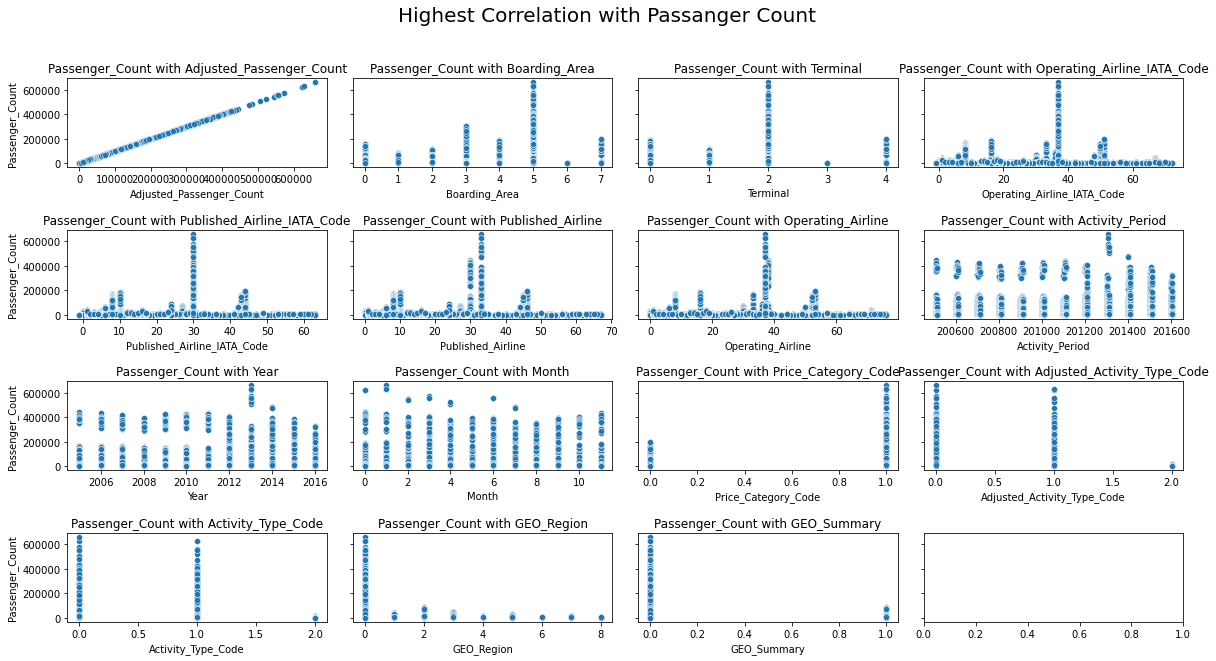

In [97]:
#Visualize columns have corr with Passenger_Count

high_corr = corr['Passenger_Count'].sort_values(ascending=False)[1:][:16].index.tolist()

fig, axes = plt.subplots(4,4, figsize=(20, 10), sharey=True);
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
fig.suptitle('Highest Correlation with Passanger Count', fontsize=20);

for i,col in zip(range(16),high_corr):
    sns.scatterplot(y=df['Passenger_Count'], x=df[col], ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title('Passenger_Count with '+col)